El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [1]:
import time 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
df.head

<bound method NDFrame.head of              DateCrawled  Price  VehicleType  RegistrationYear Gearbox  Power  \
0       24/03/2016 11:52    480          NaN              1993  manual      0   
1       24/03/2016 10:58  18300        coupe              2011  manual    190   
2       14/03/2016 12:52   9800          suv              2004    auto    163   
3       17/03/2016 16:54   1500        small              2001  manual     75   
4       31/03/2016 17:25   3600        small              2008  manual     69   
...                  ...    ...          ...               ...     ...    ...   
354364  21/03/2016 09:50      0          NaN              2005  manual      0   
354365  14/03/2016 17:48   2200          NaN              2005     NaN      0   
354366  05/03/2016 19:56   1199  convertible              2000    auto    101   
354367  19/03/2016 18:57   9200          bus              1996  manual    102   
354368  20/03/2016 19:41   3400        wagon              2002  manual    100  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
df.isna().mean().sort_values(ascending=False)

NotRepaired          0.200791
VehicleType          0.105794
FuelType             0.092827
Gearbox              0.055967
Model                0.055606
DateCrawled          0.000000
Price                0.000000
RegistrationYear     0.000000
Power                0.000000
Mileage              0.000000
RegistrationMonth    0.000000
Brand                0.000000
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

In [7]:
df['Model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

In [8]:
df.isna().mean().sort_values(ascending=False)

NotRepaired          0.200791
VehicleType          0.105794
FuelType             0.092827
Gearbox              0.055967
Model                0.055606
DateCrawled          0.000000
Price                0.000000
RegistrationYear     0.000000
Power                0.000000
Mileage              0.000000
RegistrationMonth    0.000000
Brand                0.000000
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

En esta parte del proyecto se realiza un llenado de las columnas con datos faltantes tomando en cuenta otra la columna brand, posteriormente se desarrolla una función para realizar este proceso con las demás columnas de una manera más eficiente

In [9]:
df['NotRepaired']=df.groupby('Brand')['NotRepaired'].transform(lambda X: X.fillna(X.mode()[0]))

In [10]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired              0
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [11]:
def rellenar_valores_faltantes(df, columnas_a_rellenar, columna_grupo):
    for columna in columnas_a_rellenar:
        df[columna]=df.groupby(columna_grupo)[columna].transform(lambda X: X.fillna(X.mode()[0]))
    return df

In [12]:
rellenar_valores_faltantes(df,['VehicleType','FuelType', 'Gearbox'], 'Brand')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,no,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,sedan,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,sedan,2005,manual,0,NaN,20000,1,petrol,sonstige_autos,no,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [13]:
df[df['Model'].isna()]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
59,29/03/2016 15:48,1,suv,1994,manual,286,NaN,150000,11,petrol,sonstige_autos,no,29/03/2016 00:00,0,53721,06/04/2016 01:44
81,03/04/2016 12:56,350,small,1997,manual,54,NaN,150000,3,petrol,fiat,yes,03/04/2016 00:00,0,45665,05/04/2016 11:47
115,20/03/2016 18:53,0,small,1999,manual,0,NaN,5000,0,petrol,volkswagen,no,20/03/2016 00:00,0,37520,07/04/2016 02:45
135,27/03/2016 20:51,1450,sedan,1992,manual,136,NaN,150000,0,petrol,audi,no,27/03/2016 00:00,0,38709,05/04/2016 20:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354245,07/03/2016 16:37,560,small,2001,auto,170,NaN,90000,0,petrol,fiat,yes,07/03/2016 00:00,0,55743,12/03/2016 21:45
354321,15/03/2016 13:52,9400,wagon,2007,manual,200,NaN,150000,4,gasoline,sonstige_autos,yes,15/03/2016 00:00,0,91186,17/03/2016 08:16
354338,31/03/2016 19:52,180,small,1995,manual,0,NaN,125000,3,petrol,opel,no,31/03/2016 00:00,0,41470,06/04/2016 14:18
354351,11/03/2016 23:40,1900,sedan,2000,manual,110,NaN,150000,7,petrol,volkswagen,no,11/03/2016 00:00,0,87700,12/03/2016 14:16


In [14]:
df.groupby('Brand')['Model'].apply(lambda X: X.isna().mode()[0])

Brand
alfa_romeo        False
audi              False
bmw               False
chevrolet         False
chrysler          False
citroen           False
dacia             False
daewoo            False
daihatsu          False
fiat              False
ford              False
honda             False
hyundai           False
jaguar            False
jeep              False
kia               False
lada              False
lancia            False
land_rover        False
mazda             False
mercedes_benz     False
mini              False
mitsubishi        False
nissan            False
opel              False
peugeot           False
porsche           False
renault           False
rover             False
saab              False
seat              False
skoda             False
smart             False
sonstige_autos     True
subaru            False
suzuki            False
toyota            False
trabant           False
volkswagen        False
volvo             False
Name: Model, dtype: bool

In [15]:
df_1 = df[(df['Model']!='sonstige_autos') & (df['Brand']!='sonstige_autos')]

In [16]:
df_1= rellenar_valores_faltantes(df_1, ['Model'], 'Brand')

/tmp/ipykernel_385/378822414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna]=df.groupby(columna_grupo)[columna].transform(lambda X: X.fillna(X.mode()[0]))


In [17]:
df_1[df_1['Model']=='sonstige_autos']

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen


Se realiza una inspección en la columna Model el cual tiene valores vacíos pertenecientes a sonstige_autos

<AxesSubplot:>

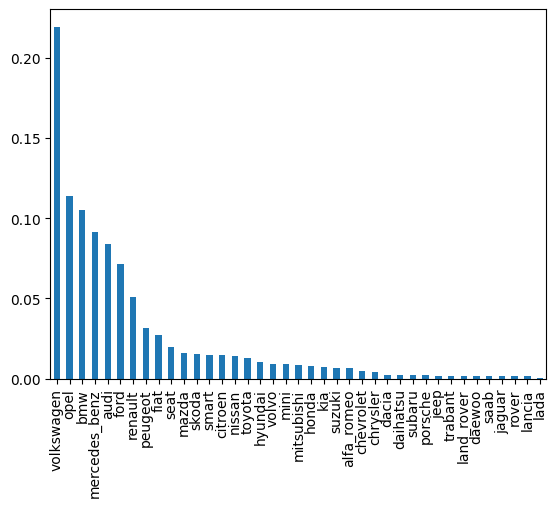

In [18]:
df_1['Brand'].value_counts(normalize=True).plot(kind='bar')

In [19]:
df_1.groupby('Brand')['Model'].transform(lambda X: X.isna().mode()[0])

0         False
1         False
2         False
3         False
4         False
          ...  
354363    False
354364    False
354366    False
354367    False
354368    False
Name: Model, Length: 350995, dtype: bool

In [20]:
df_1.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [21]:
df_1['RegistrationYear'].sort_values(ascending=False).unique()

array([9999, 9229, 9000, 8500, 8200, 8000, 7800, 7500, 7100, 7000, 6500,
       6000, 5911, 5900, 5600, 5555, 5000, 4500, 4000, 3700, 3000, 2900,
       2800, 2500, 2290, 2222, 2200, 2066, 2019, 2018, 2017, 2016, 2015,
       2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
       1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971,
       1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960,
       1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949,
       1948, 1947, 1945, 1943, 1942, 1941, 1940, 1938, 1937, 1936, 1935,
       1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1923, 1919, 1910,
       1800, 1688, 1602, 1600, 1500, 1400, 1300, 1234, 1200, 1111, 1039,
       1001, 1000])

In [22]:

df_clean=df_1.loc[(df_1['RegistrationYear']<=2019)&(df_1['RegistrationYear']>=1910)]
df_clean['RegistrationYear'].sort_values().unique()


array([1910, 1919, 1923, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943, 1945, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [23]:
df_real = df_clean.drop(['PostalCode', 'DateCrawled', 'DateCreated', 'LastSeen', 'NumberOfPictures'], axis=1)

Limpiamos todos los años de los modelos que eran ilogicas, además de las columnas que no aportaban nada al modelos como el número de fotografías, el código postal, la y las otras columnas que aportaban el perfil del usuarios de compañís y que no aportaban nada a la predicción de los modelos. 

## Entrenamiento del modelo 

In [24]:
df_real[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']]= OrdinalEncoder().fit_transform(df_real[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']])

In [25]:
df_real.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,4.0,1993,1.0,0,116.0,150000,0,6.0,37.0,0.0
1,18300,2.0,2011,1.0,190,29.0,125000,5,2.0,1.0,1.0
2,9800,6.0,2004,0.0,163,117.0,125000,8,2.0,14.0,0.0
3,1500,5.0,2001,1.0,75,116.0,150000,6,6.0,37.0,0.0
4,3600,5.0,2008,1.0,69,101.0,90000,7,2.0,31.0,0.0


In [26]:
scaler= StandardScaler()
df_real[['RegistrationYear', 'RegistrationMonth', 'Mileage', 'Power']]=scaler.fit_transform(df_real[['RegistrationYear', 'RegistrationMonth', 'Mileage', 'Power']])

In [27]:
features = df_real.drop(['Price'], axis=1)
features

,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,4.0,-1.392491,1.0,-0.584038,116.0,0.571614,-1.539851,6.0,37.0,0.0
1,2.0,1.071979,1.0,0.422526,29.0,-0.096765,-0.196161,2.0,1.0,1.0
2,6.0,0.113574,0.0,0.279488,117.0,-0.096765,0.610054,2.0,14.0,0.0
3,5.0,-0.297171,1.0,-0.186710,116.0,0.571614,0.072578,6.0,37.0,0.0
4,5.0,0.661234,1.0,-0.218496,101.0,-1.032496,0.341316,2.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...
354363,0.0,-0.434086,1.0,-0.584038,249.0,0.571614,-0.733637,6.0,24.0,0.0
354364,4.0,0.250489,1.0,-0.584038,78.0,0.571614,0.341316,6.0,22.0,1.0
354366,1.0,-0.434086,0.0,-0.048970,106.0,-0.096765,-0.733637,6.0,32.0,0.0
354367,0.0,-0.981746,1.0,-0.043672,224.0,0.571614,-0.733637,2.0,37.0,0.0


In [28]:
target = df_clean['Price']
target

0           480
1         18300
2          9800
3          1500
4          3600
          ...  
354363     1150
354364        0
354366     1199
354367     9200
354368     3400
Name: Price, Length: 350860, dtype: int64

In [29]:
print("Máximo", target.max())
print("Mínimo" ,target.min())

Máximo 20000
Mínimo 0


In [30]:
print("Media", target.mean())

Media 4411.514860628171


In [31]:
train_valid, test= train_test_split(df_real, test_size=0.25)
train, valid = train_test_split(train_valid, test_size=0.25)

features_train = train.drop(['Price'], axis=1)
target_train = train['Price']
features_valid = valid.drop(['Price'], axis=1)
target_valid = valid['Price']
features_test = test.drop(['Price'], axis=1)
target_test = test['Price']

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape) 

(197358, 10)
(65787, 10)
(87715, 10)


In [32]:
cat_features=list(features_train.columns)

In [33]:
df_real

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,4.0,-1.392491,1.0,-0.584038,116.0,0.571614,-1.539851,6.0,37.0,0.0
1,18300,2.0,1.071979,1.0,0.422526,29.0,-0.096765,-0.196161,2.0,1.0,1.0
2,9800,6.0,0.113574,0.0,0.279488,117.0,-0.096765,0.610054,2.0,14.0,0.0
3,1500,5.0,-0.297171,1.0,-0.186710,116.0,0.571614,0.072578,6.0,37.0,0.0
4,3600,5.0,0.661234,1.0,-0.218496,101.0,-1.032496,0.341316,2.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
354363,1150,0.0,-0.434086,1.0,-0.584038,249.0,0.571614,-0.733637,6.0,24.0,0.0
354364,0,4.0,0.250489,1.0,-0.584038,78.0,0.571614,0.341316,6.0,22.0,1.0
354366,1199,1.0,-0.434086,0.0,-0.048970,106.0,-0.096765,-0.733637,6.0,32.0,0.0
354367,9200,0.0,-0.981746,1.0,-0.043672,224.0,0.571614,-0.733637,2.0,37.0,0.0


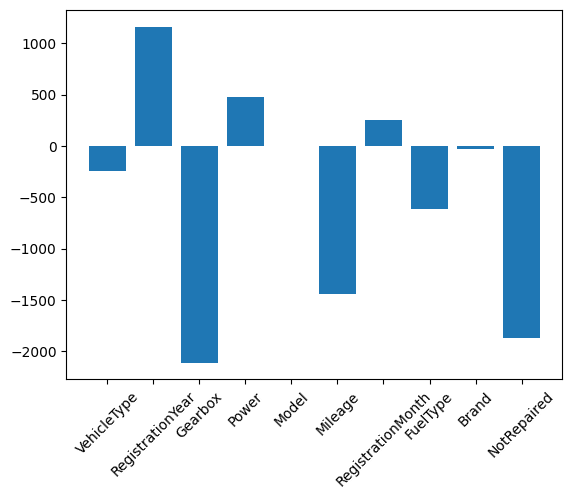

In [34]:
X = df_real.drop(['Price'], axis=1)
y = df_real['Price']
names = df_real.drop(['Price'],axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'matriz de confusión')

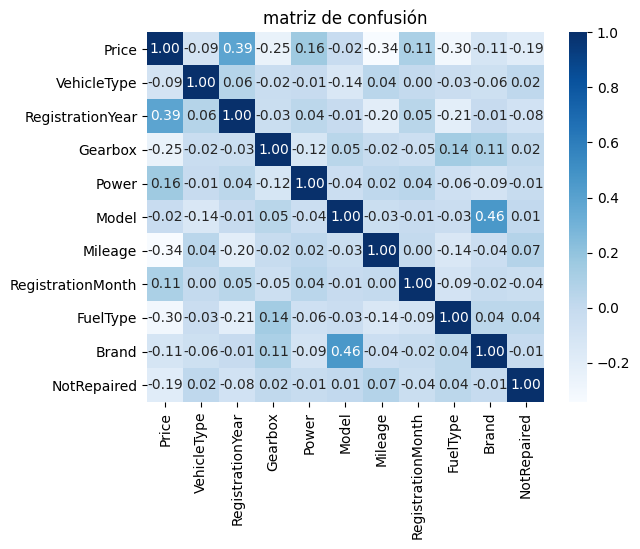

In [35]:
correlacion= df_real.corr()
sns.heatmap(correlacion, annot=True, cmap='Blues', fmt='.2f')
plt.title('matriz de confusión')

La matriz de correlación ayuda a ver la relación entre las columnas así como su correlación negativa y postiva. 

In [36]:
def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print("📊 Regression Report")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")

#### Decision Tree Regressor

In [37]:
start = time.time()
model = DecisionTreeRegressor(random_state=12345)
model.fit(features_train, target_train)
end = time.time()
predicted_valid = model.predict(features_valid)
print(regression_report(target_valid, predicted_valid))
print(f'tiempo de entrenamiento {end-start:.4f}')

📊 Regression Report
MAE  : 1278.7395
MSE  : 5193552.8298
RMSE : 2278.9368
R²   : 0.7438
None
tiempo de entrenamiento 0.7035


#### Random Forest Regressor

In [38]:
start = time.time()
model = RandomForestRegressor(random_state=12345, n_estimators=20)
model.fit(features_train, target_train)
end = time.time()
predicted_valid = model.predict(features_valid)
print(regression_report(target_valid, predicted_valid))
print(f'tiempo de entrenamiento {end-start:.4f}')

📊 Regression Report
MAE  : 1068.2618
MSE  : 3274489.1173
RMSE : 1809.5550
R²   : 0.8385
None
tiempo de entrenamiento 9.1210


#### Linear Regression 

In [39]:
start = time.time()
model = LinearRegression()
model.fit(features_train, target_train)
end = time.time()
predicted_valid = model.predict(features_valid)
print(regression_report(target_valid, predicted_valid))
print(f'tiempo de entrenamiento {end-start:.4f}')

📊 Regression Report
MAE  : 2497.7450
MSE  : 12299423.8603
RMSE : 3507.0534
R²   : 0.3932
None
tiempo de entrenamiento 0.0468


#### Cat Boost Regressor

In [40]:
start = time.time()
model = CatBoostRegressor(loss_function='RMSE', iterations=50, random_seed=12345)
model.fit(features_train, target_train)
end = time.time()
predicted_valid = model.predict(features_valid)
print(regression_report(target_valid, predicted_valid))
print(f'tiempo de entrenamiento {end-start:.4f}')

Learning rate set to 0.5
0:	learn: 3273.2191779	total: 59ms	remaining: 2.89s
1:	learn: 2711.4518413	total: 70.7ms	remaining: 1.7s
2:	learn: 2471.5817858	total: 81.5ms	remaining: 1.28s
3:	learn: 2345.3586025	total: 92.3ms	remaining: 1.06s
4:	learn: 2273.9873690	total: 103ms	remaining: 930ms
5:	learn: 2226.4937913	total: 116ms	remaining: 854ms
6:	learn: 2173.5383920	total: 127ms	remaining: 783ms
7:	learn: 2141.8054679	total: 137ms	remaining: 720ms
8:	learn: 2121.3365251	total: 147ms	remaining: 670ms
9:	learn: 2094.6650210	total: 158ms	remaining: 634ms
10:	learn: 2073.7797718	total: 169ms	remaining: 599ms
11:	learn: 2057.2016875	total: 180ms	remaining: 571ms
12:	learn: 2043.7314394	total: 190ms	remaining: 541ms
13:	learn: 2035.2612291	total: 200ms	remaining: 515ms
14:	learn: 2024.6782141	total: 211ms	remaining: 491ms
15:	learn: 2013.0080183	total: 222ms	remaining: 472ms
16:	learn: 2000.9541825	total: 233ms	remaining: 452ms
17:	learn: 1993.7133394	total: 243ms	remaining: 432ms
18:	learn: 1

#### XGBoost 

In [41]:
start = time.time()
model = xgb.XGBRegressor(booster ='gbtree', objective ='reg:squarederror', n_estimators = 100, seed = 12345)
model.fit(features_train, target_train)
end = time.time()
predicted_valid = model.predict(features_valid)
print(regression_report(target_valid, predicted_valid))
print(f'tiempo de entrenamiento {end-start:.4f}')

📊 Regression Report
MAE  : 1087.5417
MSE  : 3172043.7689
RMSE : 1781.0232
R²   : 0.8435
None
tiempo de entrenamiento 16.1176


#### LightGBM

In [42]:
start = time.time()
model = lgb.LGBMRegressor(n_estimators = 50, random_state= 12345)
model.fit(features_train, target_train)
end = time.time()
predicted_valid = model.predict(features_valid)
print(regression_report(target_valid, predicted_valid))
print(f'tiempo de entrenamiento {end-start:.4f}')

📊 Regression Report
MAE  : 1213.0252
MSE  : 3749306.9725
RMSE : 1936.3127
R²   : 0.8150
None
tiempo de entrenamiento 1.0027


## Análisis del modelo

In [43]:
start = time.time()
model = xgb.XGBRegressor(booster ='gbtree', objective ='reg:squarederror', n_estimators = 100, seed = 12345)
model.fit(features_train, target_train)
end = time.time()
predicted_valid = model.predict(features_test)
print(regression_report(target_test, predicted_valid))
print(f'tiempo de entrenamiento {end-start:.4f}')

📊 Regression Report
MAE  : 1078.2280
MSE  : 3120042.5539
RMSE : 1766.3642
R²   : 0.8447
None
tiempo de entrenamiento 16.0940


Podemos observar que el mejor modelo es XGboost pues el RSME es muy bajo lo cual refiere a mayor rendimiento, aun que es importante decir que no es el más rapido como si lo son otros modelos como catboost, o el decision tree regressor los cuales no necesitan un segundo para poder entrenar el modelo, se puede observar que los modelos de espacio de graadiente son muy efectivos ya que reducen de manera considerable la metica RMSE, decidí adherir otras meticas como es el caso de R2 el cual es aun mas facil de comprender debido a que entre mas cercana a 1 significa que es mas exitoso el modelo. Otro comentario que me gustaría mencionar es que de los modelos el mas exitoso es el Random Forest Refressor el cual sin ayuda del especio de gradinte tuvo un buen desempeño, sin embargo su tiempo es muy alto ya que en ocasiones necesitaba mas de 2 minutos en trabajar el modelo. 
Esto es improtante mencionar por que se puede observar como los mdoelos de espacio de gradiente ayudan no solo en mejorar el desempeño sino también en el tiempo. 

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [X]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [X]  Se realizó el análisis de velocidad y calidad de los modelos